In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Bidirectional

In [2]:
#Reading dataset
data_set = pd.read_csv('Foreign_Exchange_Rates.csv', na_values='ND')

In [3]:
#Dataste Shape
data_set.shape




#Dataset head
data_set.head()

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,1/3/2000,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,...,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97
1,1,1/4/2000,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13
2,2,1/5/2000,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,...,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10
3,3,1/6/2000,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62
4,4,1/7/2000,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30


In [4]:
data_set.describe()

,Unnamed: 0,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
count,5216.000000,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000,5019.000000,5018.000000,5017.000000,...,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000,5015.000000,5018.000000
mean,2607.716833,1.332000,0.843895,1.543677,0.640370,2.547714,1.230320,7.200985,7.782644,52.715794,...,1.480412,6.285921,106.587198,3.650842,7.074601,7.898808,119.108220,1.150498,31.764740,35.519804
std,1506.168019,0.269943,0.126847,0.337351,0.082619,0.724129,0.182174,0.820149,0.027543,9.680026,...,0.188948,0.943587,13.209782,0.378500,1.226933,1.201952,25.344273,0.249064,1.671145,4.563526
min,0.000000,0.906900,0.624600,1.134600,0.473800,1.537500,0.916800,6.040200,7.708500,38.480000,...,1.200700,4.660500,75.720000,2.937000,4.946700,5.834600,72.300000,0.729600,28.500000,28.600000
25%,1303.750000,1.115200,0.750800,1.323800,0.587400,1.945050,1.055700,6.475900,7.756400,45.250000,...,1.342925,5.592725,100.080000,3.291250,5.996325,6.852275,100.400000,0.966800,30.350000,31.780000
50%,2607.500000,1.311000,0.815550,1.442400,0.636400,2.328650,1.237000,6.860100,7.780650,48.090000,...,1.408450,6.071550,109.015000,3.800000,6.782500,7.747700,112.300000,1.040400,31.730000,34.000000
75%,3911.250000,1.430200,0.900100,1.591100,0.692375,3.129725,1.335700,8.276500,7.799800,62.410000,...,1.679225,6.714650,116.802500,3.800000,8.277525,8.743800,132.587500,1.269075,32.980000,39.407500
max,5216.000000,2.071300,1.209200,2.551000,0.828700,4.259400,1.612800,8.280000,7.849900,74.330000,...,1.854000,9.005000,134.770000,4.496000,9.589000,11.027000,182.800000,1.825000,35.210000,45.820000


In [5]:
df1 = data_set['Time Serie']
df1.head()

0    1/3/2000
1    1/4/2000
2    1/5/2000
3    1/6/2000
4    1/7/2000
Name: Time Serie, dtype: object

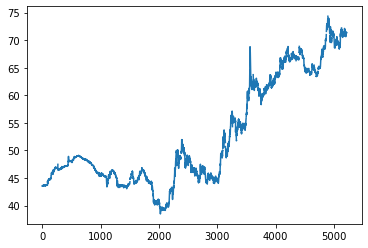

In [6]:
#Plotting Indian Exchange rate
plt.plot(data_set['INDIA - INDIAN RUPEE/US$'])

In [7]:
#Data frame
df = data_set['AUSTRALIA - AUSTRALIAN DOLLAR/US$']
df

0       1.5172
1       1.5239
2       1.5267
3       1.5291
4       1.5272
         ...  
5211       NaN
5212    1.4411
5213    1.4331
5214    1.4278
5215    1.4225
Name: AUSTRALIA - AUSTRALIAN DOLLAR/US$, Length: 5216, dtype: float64

In [8]:
#Preprocessing data set
#df = data_set.dropna()
#df.head(20)
df=df.dropna()
df = np.array(df).reshape(-1,1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df = scaler.fit_transform(df)

print(df)


#Training and test sets
train = df[:4800]
test = df[4800:]

xx = df1[4800:]

print(train.shape)
print(test.shape)





def get_data(data, look_back):
  data_x, data_y = [],[]
  for i in range(len(data)-look_back-1):
    data_x.append(data[i:(i+look_back),0])
    data_y.append(data[i+look_back,0])
  return np.array(data_x) , np.array(data_y)

look_back = 1

x_train , y_train = get_data(train, look_back)

print(x_train.shape)
print(y_train.shape)





x_test , y_test = get_data(test,look_back)

print(x_test.shape)
print(y_test.shape)





#Processing train and test sets for LSTM model
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

print(x_train.shape)
print(x_test.shape)



[[0.5241326 ]
 [0.52988664]
 [0.53229131]
 ...
 [0.45190656]
 [0.44735486]
 [0.44280316]]
(4800, 1)
(218, 1)
(4798, 1)
(4798,)
(216, 1)
(216,)
(4798, 1, 1)
(216, 1, 1)


In [9]:
#Defining the LSTM model
n_features=x_train.shape[1]
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(1,1)))
model.add(Dense(n_features))

#Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [10]:
#Compiling
model.compile(optimizer='adam', loss = 'mse')

#Training
model.fit(x_train,y_train, epochs = 10, batch_size=1)

Epoch 1/10
4798/4798 [==============================] - 7s 1ms/step - loss: 0.0041
Epoch 2/10
4798/4798 [==============================] - 8s 2ms/step - loss: 1.2998e-04
Epoch 3/10
4798/4798 [==============================] - 9s 2ms/step - loss: 1.2516e-04
Epoch 4/10
4798/4798 [==============================] - 9s 2ms/step - loss: 1.3097e-04
Epoch 5/10
4798/4798 [==============================] - 7s 1ms/step - loss: 1.2980e-04
Epoch 6/10
4798/4798 [==============================] - 9s 2ms/step - loss: 1.3028e-04
Epoch 7/10
4798/4798 [==============================] - 10s 2ms/step - loss: 1.2512e-04
Epoch 8/10
4798/4798 [==============================] - 12s 3ms/step - loss: 1.3203e-04
Epoch 9/10
4798/4798 [==============================] - 12s 3ms/step - loss: 1.2653e-04
Epoch 10/10
4798/4798 [==============================] - 13s 3ms/step - loss: 1.2578e-04: 0s


In [11]:
#Prediction using the trained model
scaler.scale_

y_pred = model.predict(x_test)
#y_pred = scaler.inverse_transform(y_pred)
print(y_pred[:10])

[[0.41379255]
 [0.42481315]
 [0.41514897]
 [0.4099775 ]
 [0.407858  ]
 [0.4157424 ]
 [0.42159182]
 [0.42481315]
 [0.424135  ]
 [0.42599994]]


In [12]:
#Processing test shape
y_test = np.array(y_test).reshape(-1,1)
y_test = scaler.inverse_transform(y_test)
print(y_test[:10])

[[1.4124]
 [1.401 ]
 [1.3949]
 [1.3924]
 [1.4017]
 [1.4086]
 [1.4124]
 [1.4116]
 [1.4138]
 [1.4239]]


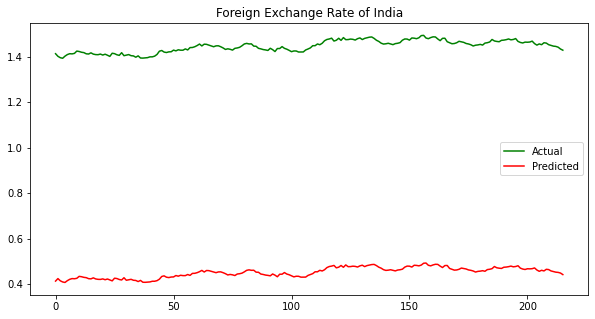

In [18]:
#Visualizing the results
plt.figure(figsize=(10,5))
plt.title('Foreign Exchange Rate of India')
plt.plot(y_test , label = 'Actual', color = 'g')
plt.plot(y_pred , label = 'Predicted', color = 'r')

plt.legend()

In [14]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.9853985432811151

In [15]:
#Mean Squared Error
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
#mean_squared_error(y_test, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9926507962979654
Mean Squared Error: 0.9853985432811151
Root Mean Squared Error: 0.9926724249625931


In [16]:
import numpy as np

def mean_absolute_percentage_error(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print( mean_absolute_percentage_error(y_test, y_pred))

68.7176982526274


### DM  TEST

In [2]:
from diebold_mariano_test import *

ori_list = [3, 5, 4, 1]  
a1_list = [2, 3, 4, 2]  
a2_list = [3, 2, 2, 4]  

#  Diebold-Mariano Test.
d_t_list = cul_d_t(MSE, ori_list, a1_list, a2_list)
print(d_t_list)   
[1, -4, -8, -16]
cul_DM(d_t_list)  
#-2.254898764780173
cul_P(d_t_list) 
#0.024139683878213303


d_t_list = cul_d_t(MAE, ori_list, a1_list, a2_list)
print(d_t_list) 
[1, 0, -2, -4]
print(cul_DM(d_t_list))  
#-1.4213381090374029
print(cul_P(d_t_list))
#0.155218489684684

ModuleNotFoundError: No module named 'diebold_mariano_test'